In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
data=pd.read_csv('Loan_prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Checking For null values

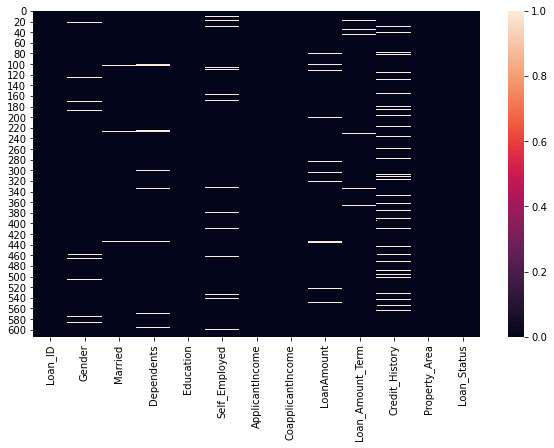

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull())

In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### some features are having null values
### Handling Null Values

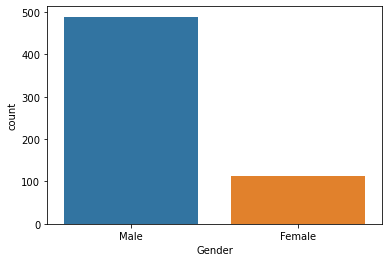

In [7]:
sns.countplot(data['Gender'])

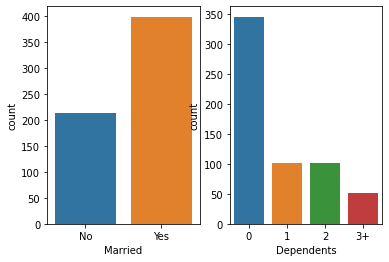

In [8]:
plt.figure()
plt.subplot(1, 2, 1)
sns.countplot(data['Married'])
plt.subplot(1, 2, 2)
sns.countplot(data['Dependents'])


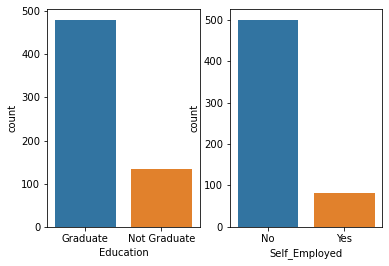

In [9]:
plt.figure()
plt.subplot(1, 2, 1)
sns.countplot(data['Education'])
plt.subplot(1, 2, 2)
sns.countplot(data['Self_Employed'])

In [10]:
### by looking at the graphs we can say that features are imbalance so we fill null values by Random Sample Imputation

In [11]:
## Creating function that simultaniously fill null values for other features too

In [12]:
def random_sampler(data,feature):
    data[feature+'_random']=data[feature]
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum(),random_state=101)
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature+'_random']=random_sample

In [13]:
random_sampler(data,'Gender')
random_sampler(data,'Married')
random_sampler(data,'Education')
random_sampler(data,'Self_Employed')
random_sampler(data,'Dependents')

In [14]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_random,Married_random,Education_random,Self_Employed_random,Dependents_random
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,Male,No,Graduate,No,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Male,Yes,Graduate,No,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Male,Yes,Graduate,Yes,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Male,Yes,Not Graduate,No,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Male,No,Graduate,No,0


In [15]:
## Now Dropping the duplicate columns

In [16]:
df=data.drop(['Gender','Married','Dependents','Education','Self_Employed'],axis=1)

In [17]:
df.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_random,Married_random,Education_random,Self_Employed_random,Dependents_random
0,LP001002,5849,0.0,NaN,360.0,1.0,Urban,Y,Male,No,Graduate,No,0
1,LP001003,4583,1508.0,128.0,360.0,1.0,Rural,N,Male,Yes,Graduate,No,1
2,LP001005,3000,0.0,66.0,360.0,1.0,Urban,Y,Male,Yes,Graduate,Yes,0
3,LP001006,2583,2358.0,120.0,360.0,1.0,Urban,Y,Male,Yes,Not Graduate,No,0
4,LP001008,6000,0.0,141.0,360.0,1.0,Urban,Y,Male,No,Graduate,No,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               614 non-null    object 
 1   ApplicantIncome       614 non-null    int64  
 2   CoapplicantIncome     614 non-null    float64
 3   LoanAmount            592 non-null    float64
 4   Loan_Amount_Term      600 non-null    float64
 5   Credit_History        564 non-null    float64
 6   Property_Area         614 non-null    object 
 7   Loan_Status           614 non-null    object 
 8   Gender_random         614 non-null    object 
 9   Married_random        614 non-null    object 
 10  Education_random      614 non-null    object 
 11  Self_Employed_random  614 non-null    object 
 12  Dependents_random     614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## ---------------------------------------------------------------------------------------------------------------------------------

## Now Handling Numerical  Null Values

In [19]:
def fill_nan(data,feature):
    median=data[feature].median()
    data[feature]=data[feature].fillna(median)

In [20]:
fill_nan(df,'LoanAmount')
fill_nan(df,'Loan_Amount_Term')
random_sampler(df,'Credit_History')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_ID                614 non-null    object 
 1   ApplicantIncome        614 non-null    int64  
 2   CoapplicantIncome      614 non-null    float64
 3   LoanAmount             614 non-null    float64
 4   Loan_Amount_Term       614 non-null    float64
 5   Credit_History         564 non-null    float64
 6   Property_Area          614 non-null    object 
 7   Loan_Status            614 non-null    object 
 8   Gender_random          614 non-null    object 
 9   Married_random         614 non-null    object 
 10  Education_random       614 non-null    object 
 11  Self_Employed_random   614 non-null    object 
 12  Dependents_random      614 non-null    object 
 13  Credit_History_random  614 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


In [22]:
df.drop(['Credit_History'],axis=1,inplace=True)

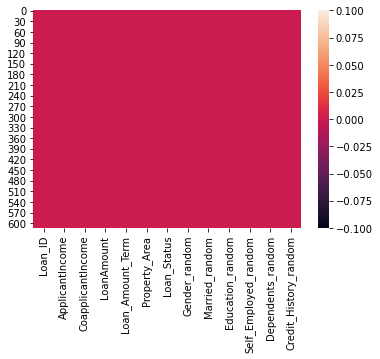

In [23]:
sns.heatmap(df.isnull())

In [24]:
### No Null Value Now

## ---------------------------------------------------------------------------------------------------------------------------------

### Checking For Outliers in Numeric Features

### Fro ApplicantIncome feature

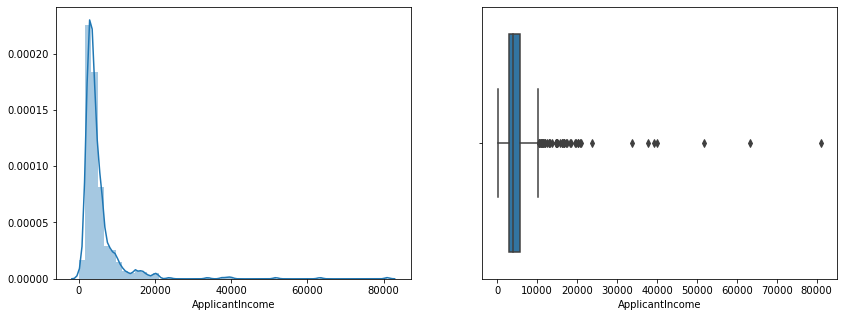

In [25]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
sns.distplot(df['ApplicantIncome'])
plt.subplot(1, 2, 2)
sns.boxplot(df['ApplicantIncome'])


#### AS we can see ApplicantIncome feature having an outlier, so we have to eliminate that outlier
It seems ApplicantIncome feature is right skewed
 

In [26]:
IQR=df['ApplicantIncome'].quantile(0.75)-df['ApplicantIncome'].quantile(0.5)
IQR

1982.5

In [27]:
upper_bridge=df['ApplicantIncome'].quantile(0.75)+(IQR*3)
lower_bridge=df['ApplicantIncome'].quantile(0.25)-(IQR*3)
print(upper_bridge),print(lower_bridge)

11742.5
-3070.0


(None, None)

In [28]:
# we considering the value which is less than 10000

In [29]:
df.loc[df['ApplicantIncome']>=10000,'ApplicantIncome']=10000

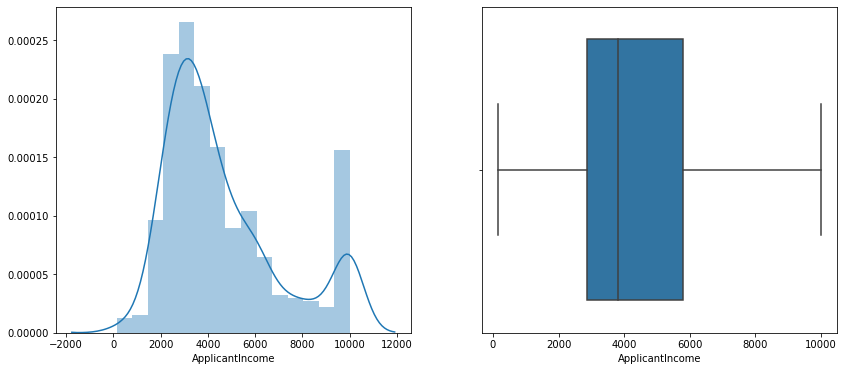

In [30]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sns.distplot(df['ApplicantIncome'])
plt.subplot(1, 2, 2)
sns.boxplot(df['ApplicantIncome'])

## -----------------------------------------------------------------------------------------------------------------------------

### For CoapplicantIncome

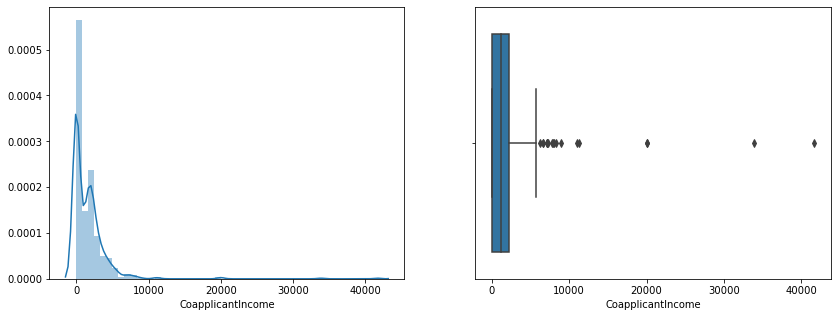

In [31]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
sns.distplot(df['CoapplicantIncome'])
plt.subplot(1, 2, 2)
sns.boxplot(df['CoapplicantIncome'])

In [32]:
IQR=df['CoapplicantIncome'].quantile(0.75)-df['CoapplicantIncome'].quantile(0.5)
upper_bridge=df['CoapplicantIncome'].quantile(0.75)+(IQR*3)
lower_bridge=df['CoapplicantIncome'].quantile(0.25)-(IQR*3)
print(upper_bridge),print(lower_bridge)

5623.5
-3326.25


(None, None)

In [33]:
df.loc[df['CoapplicantIncome']>=5600,'CoapplicantIncome']=5600

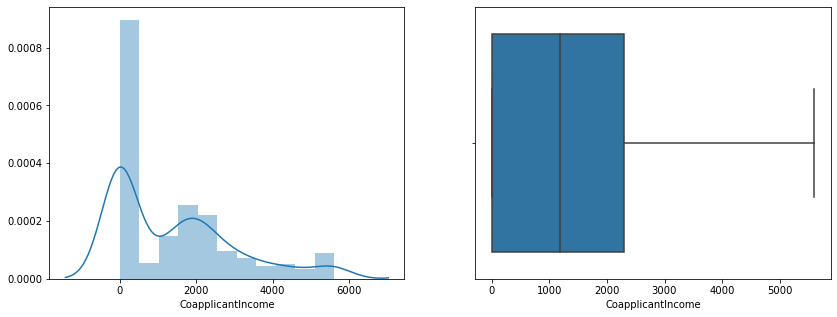

In [34]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
sns.distplot(df['CoapplicantIncome'])
plt.subplot(1, 2, 2)
sns.boxplot(df['CoapplicantIncome'])

## --------------------------------------------------------------------------------------------------------------------------------

### For LoanAmount

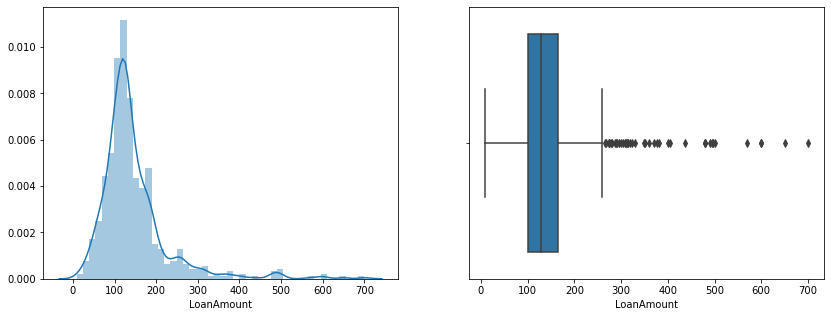

In [35]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
sns.distplot(df['LoanAmount'])
plt.subplot(1, 2, 2)
sns.boxplot(df['LoanAmount'])

In [36]:
IQR=df['LoanAmount'].quantile(0.75)-df['LoanAmount'].quantile(0.5)
upper_bridge=df['LoanAmount'].quantile(0.75)+(IQR*3)
lower_bridge=df['LoanAmount'].quantile(0.25)-(IQR*3)
print(upper_bridge),print(lower_bridge)

275.0
-10.0


(None, None)

In [37]:
df.loc[df['LoanAmount']>=275,'LoanAmount']=275

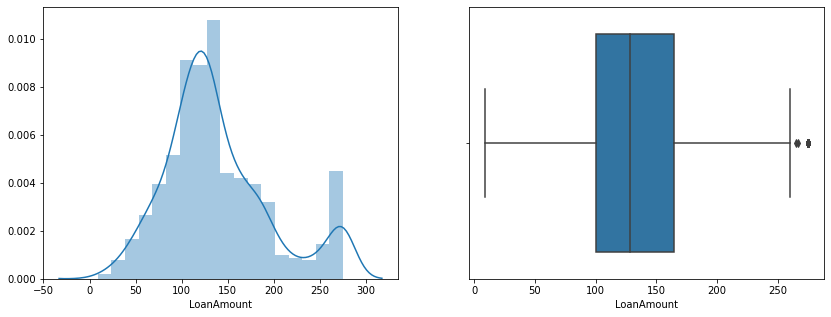

In [38]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
sns.distplot(df['LoanAmount'])
plt.subplot(1, 2, 2)
sns.boxplot(df['LoanAmount'])

## --------------------------------------------------------------------------------------------------------------------------------

## Now Handling Categorical Features

In [39]:
dummies=pd.get_dummies(df[['Property_Area','Gender_random','Married_random','Education_random','Self_Employed_random','Dependents_random']],drop_first=True)

In [40]:
df.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Gender_random,Married_random,Education_random,Self_Employed_random,Dependents_random,Credit_History_random
0,LP001002,5849,0.0,128.0,360.0,Urban,Y,Male,No,Graduate,No,0,1.0
1,LP001003,4583,1508.0,128.0,360.0,Rural,N,Male,Yes,Graduate,No,1,1.0
2,LP001005,3000,0.0,66.0,360.0,Urban,Y,Male,Yes,Graduate,Yes,0,1.0
3,LP001006,2583,2358.0,120.0,360.0,Urban,Y,Male,Yes,Not Graduate,No,0,1.0
4,LP001008,6000,0.0,141.0,360.0,Urban,Y,Male,No,Graduate,No,0,1.0


In [41]:
df=df.drop(['Property_Area','Gender_random','Married_random','Education_random','Self_Employed_random','Dependents_random'],axis=1)

In [42]:
final_df=pd.concat([df,dummies],axis=1)
final_df.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Credit_History_random,Property_Area_Semiurban,Property_Area_Urban,Gender_random_Male,Married_random_Yes,Education_random_Not Graduate,Self_Employed_random_Yes,Dependents_random_1,Dependents_random_2,Dependents_random_3+
0,LP001002,5849,0.0,128.0,360.0,Y,1.0,0,1,1,0,0,0,0,0,0
1,LP001003,4583,1508.0,128.0,360.0,N,1.0,0,0,1,1,0,0,1,0,0
2,LP001005,3000,0.0,66.0,360.0,Y,1.0,0,1,1,1,0,1,0,0,0
3,LP001006,2583,2358.0,120.0,360.0,Y,1.0,0,1,1,1,1,0,0,0,0
4,LP001008,6000,0.0,141.0,360.0,Y,1.0,0,1,1,0,0,0,0,0,0


In [43]:
final_df.drop(['Loan_ID'],axis=1,inplace=True)

In [44]:
target={'Y':1,'N':0}
final_df['Loan_Status']=final_df['Loan_Status'].map(target)

In [45]:
final_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Credit_History_random,Property_Area_Semiurban,Property_Area_Urban,Gender_random_Male,Married_random_Yes,Education_random_Not Graduate,Self_Employed_random_Yes,Dependents_random_1,Dependents_random_2,Dependents_random_3+
0,5849,0.0,128.0,360.0,1,1.0,0,1,1,0,0,0,0,0,0
1,4583,1508.0,128.0,360.0,0,1.0,0,0,1,1,0,0,1,0,0
2,3000,0.0,66.0,360.0,1,1.0,0,1,1,1,0,1,0,0,0
3,2583,2358.0,120.0,360.0,1,1.0,0,1,1,1,1,0,0,0,0
4,6000,0.0,141.0,360.0,1,1.0,0,1,1,0,0,0,0,0,0


In [75]:
final_df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

## ---------------------------------------------------------------------------------------------------------------------------------

### Seperating Dependent feature and independent fetures

In [46]:
X=final_df.drop(['Loan_Status'],axis=1)
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History_random,Property_Area_Semiurban,Property_Area_Urban,Gender_random_Male,Married_random_Yes,Education_random_Not Graduate,Self_Employed_random_Yes,Dependents_random_1,Dependents_random_2,Dependents_random_3+
0,5849,0.0,128.0,360.0,1.0,0,1,1,0,0,0,0,0,0
1,4583,1508.0,128.0,360.0,1.0,0,0,1,1,0,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,1,1,0,1,0,0,0
3,2583,2358.0,120.0,360.0,1.0,0,1,1,1,1,0,0,0,0
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,0,0,0,0,0


In [77]:
Y=final_df['Loan_Status']
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

## ----------------------------------------------------------------------------------------------------------------------------------

### Scaling the independent features

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
array=sc.fit_transform(X)
X=pd.DataFrame(array,columns=X.columns)
X.head()

## ---------------------------------------------------------------------------------------------------------------------------------

### Slitting the data into train and test sets

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

## Applying Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [79]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [80]:
y_pred=rf.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

### Checking for Accuracy and classification reports

In [81]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [83]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


0.745945945945946
              precision    recall  f1-score   support

           0       0.72      0.44      0.54        64
           1       0.75      0.91      0.82       121

    accuracy                           0.75       185
   macro avg       0.74      0.67      0.68       185
weighted avg       0.74      0.75      0.73       185

[[ 28  36]
 [ 11 110]]


## ---------------------------------------------------------------------------------------------------------------------------------

### Some hyperparameter tunning

In [84]:
params={
    'n_estimators' : [int(i) for i in np.linspace(10,1000,5)],
    'criterion': ['entropy','gini'],
    'max_features': ['auto','sqrt','log2'],
    'max_depth': [int(i) for i in np.linspace(10,1000,10)],
    'min_samples_split': [int(i) for i in np.linspace(1,40,2)],
    'min_samples_leaf': [int(i) for i in np.linspace(1,40,2)]
  }

In [86]:
from sklearn.model_selection import RandomizedSearchCV
rs=RandomizedSearchCV(rf,param_distributions=params,n_iter=100,n_jobs=-1,cv=3,verbose=3,random_state=0)

In [87]:
rs.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   31.3s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 40],
                                        'min_samples_split': [1, 40],
                                        'n_estimators': [10, 257, 505, 752,
                                                         1000]},
                   random_state=0, verbose=3)

In [88]:
best_random_grid=rs.best_estimator_

In [89]:
y_pred=best_random_grid.predict(x_test)

In [90]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


0.7567567567567568
              precision    recall  f1-score   support

           0       0.77      0.42      0.55        64
           1       0.75      0.93      0.83       121

    accuracy                           0.76       185
   macro avg       0.76      0.68      0.69       185
weighted avg       0.76      0.76      0.73       185

[[ 27  37]
 [  8 113]]


## ---------------------------------------------------------------------------------------------------------------------------------

## Applying Logistic Regressor

In [98]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [99]:
y_pred_lr=lr.predict(x_test)
y_pred_lr

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [100]:
print(accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))
print(confusion_matrix(y_test,y_pred_lr))

0.7567567567567568
              precision    recall  f1-score   support

           0       0.77      0.42      0.55        64
           1       0.75      0.93      0.83       121

    accuracy                           0.76       185
   macro avg       0.76      0.68      0.69       185
weighted avg       0.76      0.76      0.73       185

[[ 27  37]
 [  8 113]]


## ---------------------------------------------------------------------------------------------------------------------------------

## Applying XGBoost Classifier

In [107]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [109]:
xgb.fit(x_train,y_train)

[09:38:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [111]:
y_pred_xgb=xgb.predict(x_test)

In [112]:
print(accuracy_score(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))
print(confusion_matrix(y_test,y_pred_xgb))

0.7351351351351352
              precision    recall  f1-score   support

           0       0.69      0.42      0.52        64
           1       0.75      0.90      0.82       121

    accuracy                           0.74       185
   macro avg       0.72      0.66      0.67       185
weighted avg       0.73      0.74      0.72       185

[[ 27  37]
 [ 12 109]]
